In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 578.1 MB 31 kB/s /s eta 0:00:01B 12.4 MB/s eta 0:00:42�█████████▍                 | 259.3 MB 89.5 MB/s eta 0:00:04��█████████████▋              | 318.7 MB 89.5 MB/s eta 0:00:03
     |████████████████████████████████| 14.1 MB 77.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 86.6 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 91.3 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 85.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 73.2 MB/s eta 0:00:01█████████▍                      | 1.7 MB 73.2 MB/s eta 0:00:01
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Uninstalling absl-py-0.12.0:
      Successfully uninstalled absl-py-0.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attemp

In [3]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

2022-11-17 15:15:22.289446: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-17 15:15:22.325704: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-17 15:15:23.056457: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-17 15:15:23.056629: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cfsqIQ3AGixnhhrmseDPNd6p657ZdFzOaF0noHqsK2xG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'diseaseprediction-donotdelete-pr-xuizddnjq94zqq'
object_key = 'fruit-dataset.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [8]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [9]:
pwd

'/home/wsuser/work'

In [10]:
import os
filenames=os.listdir('/home/wsuser/work/fruit-dataset/train')

In [11]:
x_train = train_datagen.flow_from_directory('/home/wsuser/work/fruit-dataset/train',target_size=(64,64),class_mode='categorical',batch_size=100)
x_test = train_datagen.flow_from_directory('/home/wsuser/work/fruit-dataset/test',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [12]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [177]:
model = Sequential()

In [178]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [179]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [180]:
model.add(Flatten())

In [181]:
model.add(Dense(300,activation='relu')) # Hidden layer
model.add(Dense(150,activation='relu')) # Hidden layer
model.add(Dense(units = 6,activation='softmax')) 

In [182]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [183]:
len(x_train)

54

In [184]:
model.fit(x_train,
          steps_per_epoch=len(x_train),
          epochs=10,
          )

Epoch 1/10
54/54 [==============================] - 31s 565ms/step - loss: 0.8784 - accuracy: 0.6902
Epoch 2/10
54/54 [==============================] - 31s 566ms/step - loss: 0.3273 - accuracy: 0.8854
Epoch 3/10
54/54 [==============================] - 31s 571ms/step - loss: 0.2482 - accuracy: 0.9146
Epoch 4/10
54/54 [==============================] - 31s 572ms/step - loss: 0.1883 - accuracy: 0.9352
Epoch 5/10
54/54 [==============================] - 32s 577ms/step - loss: 0.1843 - accuracy: 0.9348
Epoch 6/10
54/54 [==============================] - 31s 572ms/step - loss: 0.1327 - accuracy: 0.9564
Epoch 7/10
54/54 [==============================] - 32s 587ms/step - loss: 0.1390 - accuracy: 0.9545
Epoch 8/10
54/54 [==============================] - 32s 584ms/step - loss: 0.0995 - accuracy: 0.9669
Epoch 9/10
54/54 [==============================] - 31s 567ms/step - loss: 0.0982 - accuracy: 0.9658
Epoch 10/10
54/54 [==============================] - 31s 565ms/step - loss: 0.0913 - accura

In [185]:
model.save("fruits_train.h5")

In [186]:
!tar -zcvf fruits-model_new.tgz fruits_train.h5

fruits_train.h5


In [187]:
ls -1

fruit-dataset/
fruits_model_new.tar.gz
fruits-model_new.tgz
fruits_train.h5


In [188]:
!pip install watson-machine-learning-client --upgrade

In [189]:
from ibm_watson_machine_learning import APIClient
wml_credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"9Mu65MQBe6ruThRUvbGPUQ_87a9ZFJU5oMrWNCogAk6N"
}
client = APIClient(wml_credentials)

In [190]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/f50d9228d5394e6c8f4013a4b2f99a8c:077c2666-31db-46d7-b41c-3e0f38fc29a3::',
      'guid': '077c2666-31db-46d7-b41c-3e0f38fc29a3',
      'name': 'Watson Machine Learning-q3',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Fruits_classification',
    'scope': {'bss_account_id': 'f50d9228d5394e6c8f4013a4b2f99a8c'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'c7a5fd69-33f2-47a2-8677-d86ed8800c74',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'ee3a582098d94ffe9850ded0fc6e230c',
        'api_key': 'rKpYztuqR3Xx59XDXNhApQKHKvhfU_0RdUl4NVQJe_4o',
        'secret_access_key': '8687d6b9badb2dfc18bb17ffbc218438c438ad9843196547',
        'service_id': 'ServiceId-eebe73f3-9cb1-4fd5-b124-cab0e8b061c0'},
       'editor': {'access_key_id': '6972085b8e3a4a3f8162f8b8b62bd87e',
       

In [191]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [192]:
space_uid = guid_from_space_name(client,'Fruits_classification')
print("Space UID = " + space_uid)

Space UID = 8ec6ad5f-ee04-429c-b297-c0568f2b73b0


In [193]:
client.set.default_space(space_uid)

'SUCCESS'

In [194]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [195]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [196]:
model_details = client.repository.store_model(model='fruits-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [197]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-17T16:37:24.387Z',
  'id': '931c5454-97ae-462a-86f0-abd42a2f6b33',
  'modified_at': '2022-11-17T16:37:30.007Z',
  'name': 'CNN',
  'owner': 'IBMid-665002HBCC',
  'resource_key': 'ae5293c9-9b0d-4fd2-90f7-cfd66e922d7d',
  'space_id': '8ec6ad5f-ee04-429c-b297-c0568f2b73b0'},
 'system': {'warnings': []}}

In [198]:
model_id = client.repository.get_model_id(model_details)
model_id

'931c5454-97ae-462a-86f0-abd42a2f6b33'

In [199]:
client.repository.download(model_id,'fruits_model_new.tar.gz')

File with name: 'fruits_model_new.tar.gz' already exists.


WMLClientError: File with name: 'fruits_model_new.tar.gz' already exists.

In [200]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [201]:
model = load_model("fruits_train.h5")

In [202]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cfsqIQ3AGixnhhrmseDPNd6p657ZdFzOaF0noHqsK2xG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'diseaseprediction-donotdelete-pr-xuizddnjq94zqq'
object_key = '0da48999-25da-4373-8277-3718a8203d0a___RS_HL 8012.JPG'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [203]:
img = Image.open(streaming_body_4).convert("L") # convert image to monochrome
img = img.resize( (64,64) ) # resizing of input image

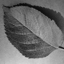

In [204]:
img

In [205]:
x = np.array(img) #converting to image
x=np.ones((64,64,3))

In [206]:
x=np.expand_dims(x,axis=0)

In [210]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 37ms/step


In [216]:
index=["Apple___Black_rot","Apple___healthy","Corn_(maize)___Northern_Leaf_Blight","corn blight","Peach___Bacterial_spot", "Peach___healthy"]

In [218]:
preds=(index[y[0]-2])
preds

'apple healthy'